In [1]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [2]:
%matplotlib inline
from __future__ import print_function
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
# from sklearn import datasets, linear_model

In [4]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree+1)):
        y = y *X
        array.append(y)
    return np.array(array).transpose()

In [9]:
X = np.array(range(10))
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
polynomials(X,3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [14]:
def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

In [15]:
monomials(X,3)

array([[  0],
       [  1],
       [  8],
       [ 27],
       [ 64],
       [125],
       [216],
       [343],
       [512],
       [729]])

In [16]:
def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b-a)
        y = func(x)
        data.append(((x, y)))
    return list(sorted(data))

In [21]:
mu, sigma = 0, 0.1
f = lambda x: 4+5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n = 20)
data

[(0.11218837918761482, 4.389064101467943),
 (0.13288575797427082, 4.644916791346777),
 (0.24759898036814665, 5.073292794450288),
 (0.26454998124831053, 5.31216141384191),
 (0.4955749992899936, 5.532432263903056),
 (0.6502774798755058, 5.942977752656797),
 (0.7293492326594284, 6.072314877521174),
 (0.7712578747120806, 6.098273673959153),
 (0.7934497773553733, 6.147026565783862),
 (0.9297913086760439, 6.211143436466188),
 (0.9385878723279626, 6.301788307950943),
 (1.0518131569203135, 6.1958867935563005),
 (1.1678882871725547, 6.026143505959193),
 (1.5307259257172752, 5.021929079131047),
 (1.539084193314458, 4.935940048413644),
 (1.6049099971405518, 4.964113807373031),
 (1.6653361445998185, 4.437294309899518),
 (1.667238876367188, 4.38783821344937),
 (1.8552409941284536, 3.558749191726232),
 (1.9790794263483673, 2.9265085142243747)]

In [23]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 3):
    X = monomials(domain, i)
    # create linear regresion object
    regr = sm.OLS(Y,X).fit()
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse-var-0.01
    print(regr.summary())
    print("Residual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
#    print("Variance: {var}".format(var=var))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     37.07
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           7.44e-06
Time:                        10:48:34   Log-Likelihood:                -50.878
No. Observations:                  20   AIC:                             103.8
Df Residuals:                      19   BIC:                             104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.7028      0.608      6.089      0.0

In [ ]:
#parent code

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     500.5
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.12e-15
Time:                        11:16:16   Log-Likelihood:                -11.472
No. Observations:                  20   AIC:                             24.94
Df Residuals:                      19   BIC:                             25.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7207      0.077     22.371      0.0

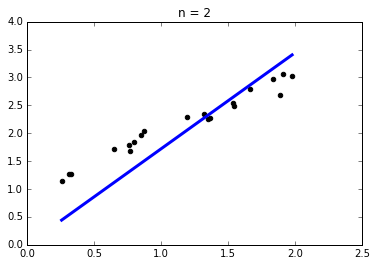

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     281.3
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           7.61e-13
Time:                        11:16:16   Log-Likelihood:                -29.817
No. Observations:                  20   AIC:                             61.63
Df Residuals:                      19   BIC:                             62.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3781      0.201     16.771      0.0

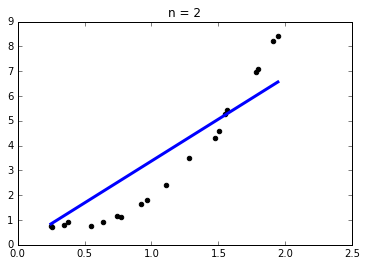

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           8.08e-10
Time:                        11:16:17   Log-Likelihood:                -53.029
No. Observations:                  20   AIC:                             108.1
Df Residuals:                      19   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             6.9226      0.617     11.213      0.0

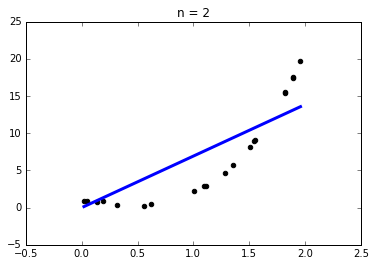

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     82.91
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.33e-08
Time:                        11:16:17   Log-Likelihood:                -65.559
No. Observations:                  20   AIC:                             133.1
Df Residuals:                      19   BIC:                             134.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            10.7601      1.182      9.106      0.0

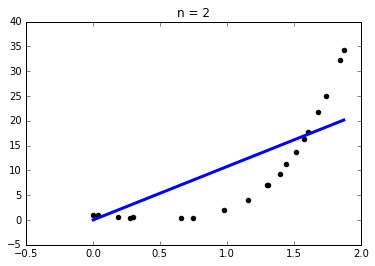

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     40.12
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.45e-06
Time:                        11:16:17   Log-Likelihood:                -79.484
No. Observations:                  20   AIC:                             161.0
Df Residuals:                      19   BIC:                             162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            17.0056      2.685      6.334      0.0

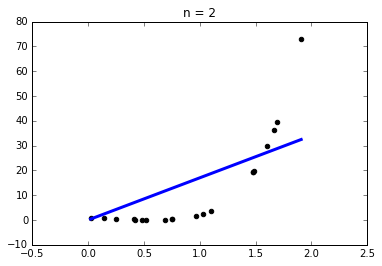

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     33.97
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.30e-05
Time:                        11:16:18   Log-Likelihood:                -99.653
No. Observations:                  20   AIC:                             201.3
Df Residuals:                      19   BIC:                             202.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            35.9237      6.164      5.828      0.0

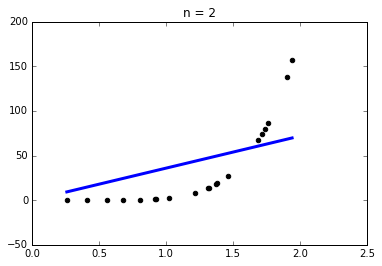

In [30]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()
    print(regr.summary())
    
    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    print("\nResidual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()